# Dataset Preparation

In [9]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
#temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']


In [10]:
import pandas as pd
Data_dict={}
Data_dict['weather']=weather
#Data_dict['temp']=temp
Data_dict['play']=play
Data_dict=pd.DataFrame(Data_dict)
Data_dict

,weather,play
0,Sunny,No
1,Sunny,No
2,Overcast,Yes
3,Rainy,Yes
4,Rainy,Yes
5,Rainy,No
6,Overcast,Yes
7,Sunny,No
8,Sunny,Yes
9,Rainy,Yes


# P(h|D)=P(D|h)P(h)/P(D)

P(Yes | Overcast) = P(Overcast | Yes) P(Yes) / P (Overcast)
1. Calculate Prior Probabilities: P(Overcast) = 4/14 = 0.29 P(Yes)= 9/14 = 0.64
2. Calculate Posterior Probabilities: P(Overcast |Yes) = 4/9 = 0.44
3. Put Prior and Posterior probabilities in equation (1) P (Yes | Overcast) = 0.44 * 0.64 / 0.29 = 0.98(Higher)

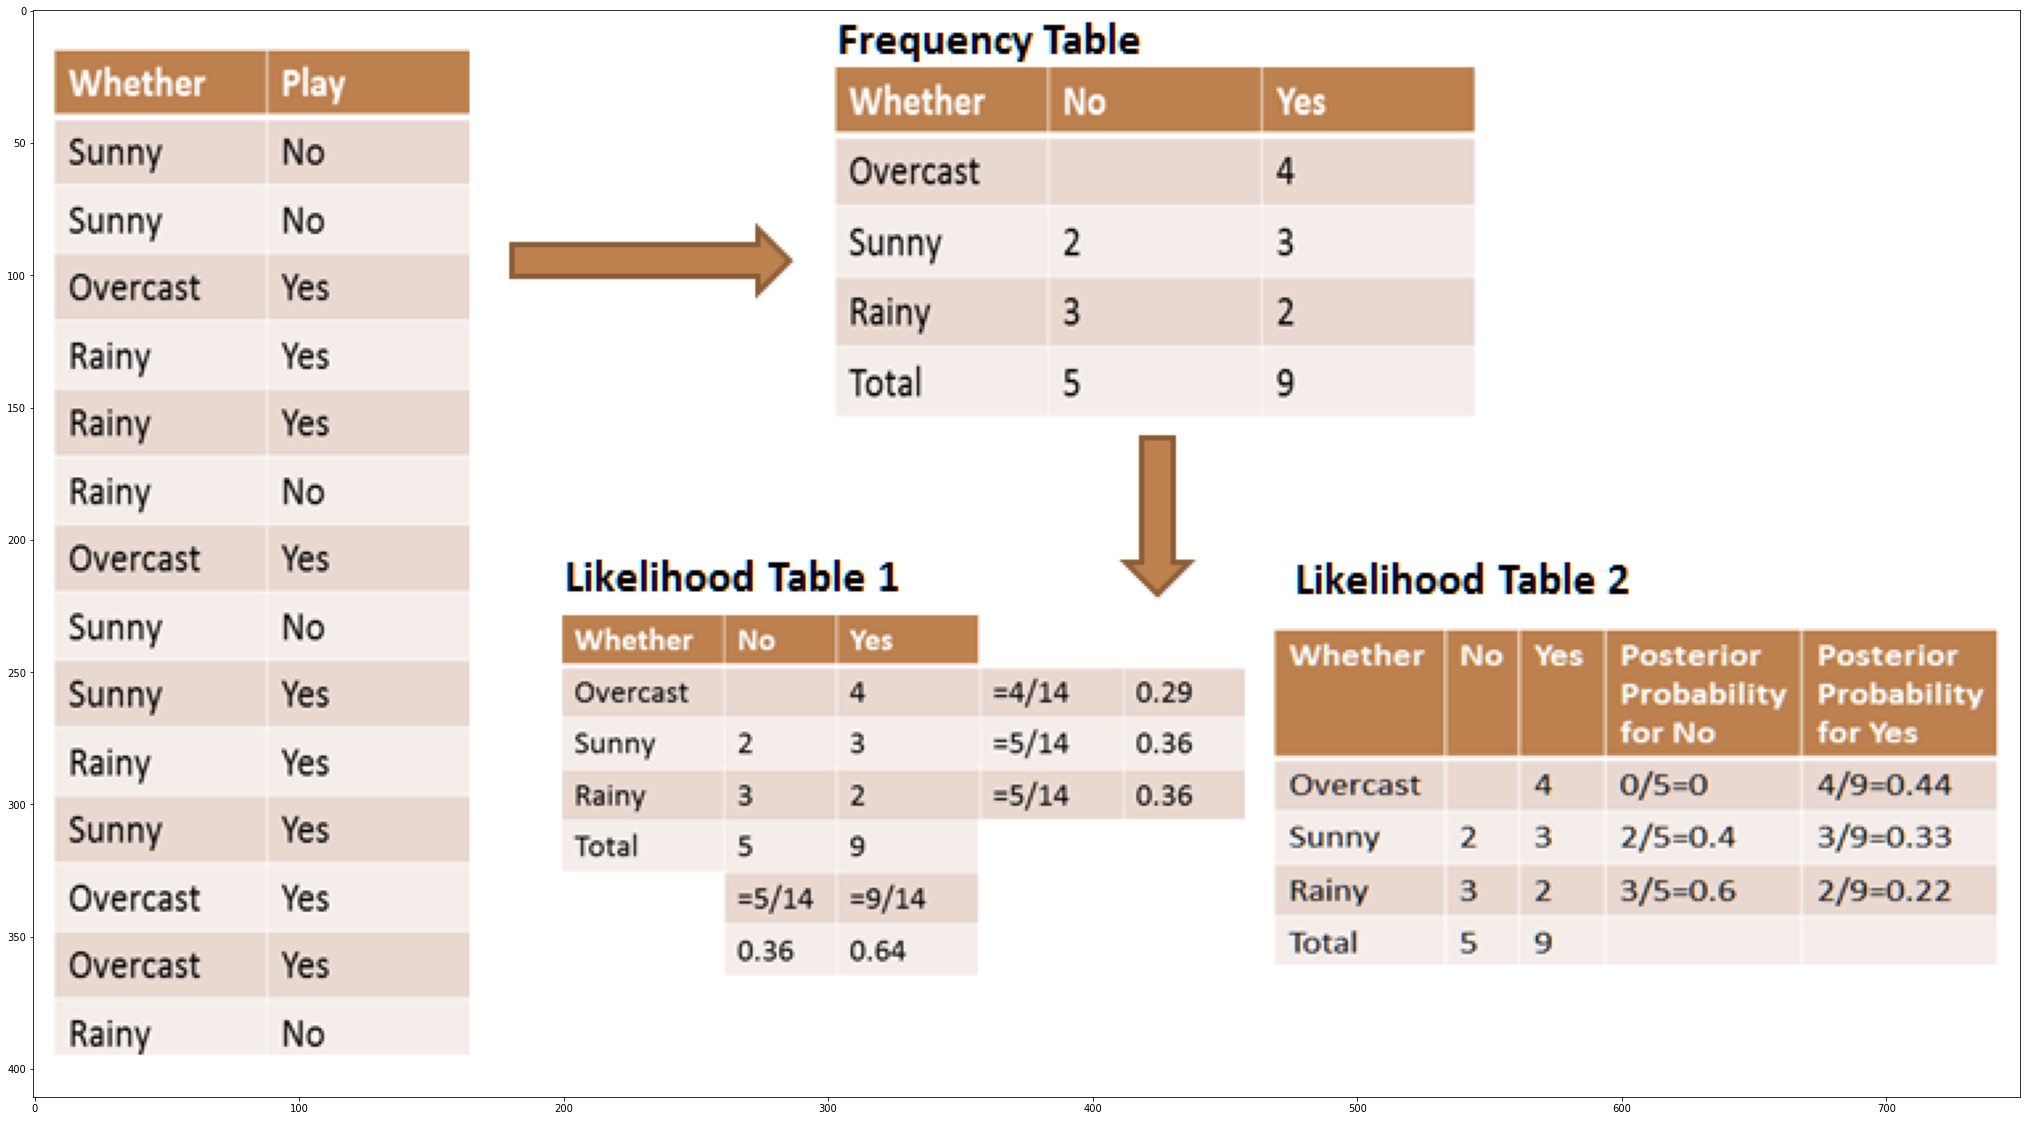

In [11]:
import cv2
import matplotlib.pyplot as plt
I=cv2.imread('NB.jpg')
plt.figure(figsize = (200,20))
plt.imshow(I)


In [43]:
Frequency_table=pd.DataFrame(columns=['weather','No','Yes'])
Frequency_table['weather']=Data_dict['weather'].unique()
#Frequency_table=pd.DataFrame({'weather':Data_dict['weather'].unique(),'No':[],'Yes':[]})

for i in range(len(Frequency_table)):
    Frequency_table.loc[i,'No']=Data_dict.loc[(Data_dict['weather'] == Frequency_table.loc[i,'weather']) & (Data_dict['play'] =='No')]['play'].count()
    Frequency_table.loc[i,'Yes']=Data_dict.loc[(Data_dict['weather'] == Frequency_table.loc[i,'weather']) & (Data_dict['play'] =='Yes')]['play'].count()
lastpos=len(Frequency_table)    
Frequency_table.loc[lastpos,'weather']='Total'
Frequency_table.loc[lastpos,'No']=Frequency_table['No'].sum()
Frequency_table.loc[lastpos,'Yes']=Frequency_table['Yes'].sum()
Frequency_table.reset_index(drop=True)

,weather,No,Yes
0,Sunny,3,2
1,Overcast,0,4
2,Rainy,2,3
3,Total,5,9


In [84]:
likelihood_table_1=Frequency_table.copy()
#likelihood_table_1['Prob']=[]

Total_freq=len(Data_dict)

for i in range(len(likelihood_table_1)-1):
    likelihood_table_1.loc[i,'prob']=likelihood_table_1.loc[i,['No','Yes']].sum()/Total_freq

In [85]:
likelihood_table_1.loc[4,'No']=float(likelihood_table_1.loc[3,['No']]/likelihood_table_1.loc[3,['No','Yes']].sum())
likelihood_table_1.loc[4,'Yes']=float(likelihood_table_1.loc[3,['Yes']]/likelihood_table_1.loc[3,['No','Yes']].sum())

In [86]:
likelihood_table_1.reset_index(drop=True)
#Frequency_table.reset_index(drop=True)

,weather,No,Yes,prob
0,Sunny,3,2,0.357143
1,Overcast,0,4,0.285714
2,Rainy,2,3,0.357143
3,Total,5,9,NaN
4,NaN,0.357143,0.642857,NaN


In [51]:
likelihood_table_2=Frequency_table.copy()
for i in range(len(Frequency_table)-1):
    likelihood_table_2.loc[i,'Posterior_No']=likelihood_table_2.loc[i,'No']/Frequency_table.iloc[-1]['No']
    likelihood_table_2.loc[i,'Posterior_Yes']=likelihood_table_2.loc[i,'Yes']/Frequency_table.iloc[-1]['Yes']

In [52]:
likelihood_table_2

,weather,No,Yes,Posterior_No,Posterior_Yes
0,Sunny,3,2,0.6,0.222222
1,Overcast,0,4,0.0,0.444444
2,Rainy,2,3,0.4,0.333333
3,Total,5,9,NaN,NaN


# Decision making

In [71]:
print("If weather is Sunny then Probability of Playing")

prior_weather=likelihood_table_1.loc[likelihood_table_1['weather']=='Sunny','prob']

prior_play=likelihood_table_1.iloc[-1]['Yes']

posterior=likelihood_table_2.loc[likelihood_table_2['weather']=='Sunny','Posterior_Yes']

print(float(posterior*prior_play/prior_weather))


If weather is Sunny then Probability of Playing
0.39999999999999997


# For Multiple Features

In [53]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [54]:
import pandas as pd
Data_dict={}
Data_dict['weather']=weather
Data_dict['temp']=temp
Data_dict['play']=play
Data_dict=pd.DataFrame(Data_dict)
Data_dict

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [55]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)

# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)

label=le.fit_transform(play)

print ("Weather:",weather_encoded)
print ("Temp:",temp_encoded)
print ("Play:",label)

Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [57]:
#Combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))
print (features)


[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [89]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild

print ("Predicted Value:", le.inverse_transform(predicted))


Predicted Value: ['Yes']
